### Train/Test Document

This document has been used simply to run on individual genre datafiles to output mean absolute error and percent errors. While there is only 1 run through of the process, this document had the original csv file changed for each of the genre files in order to maximize efficiency on getting results.

In [1]:
import pandas as pd
Romance_Books = pd.read_csv('NonFiction_books.csv')
Romance_Books.head()

,Unnamed: 0,book_id,genres,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,...,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
0,0,287140,{'non-fiction': 3},0850308712,5,[],US,NaN,"[{'count': '32', 'name': 'to-read'}, {'count':...",NaN,...,9780850308716,NaN,NaN,NaN,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
1,1,287149,"{'non-fiction': 24, 'history, historical ficti...",0922915113,39,[],US,NaN,"[{'count': '961', 'name': 'to-read'}, {'count'...",NaN,...,9780922915118,4.0,NaN,2000.0,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,986,278586,The Devil's Notebook,The Devil's Notebook
2,2,89371,"{'non-fiction': 266, 'fiction': 33, 'young-adu...",0413675106,2,['1070125'],US,NaN,"[{'count': '2979', 'name': 'to-read'}, {'count...",NaN,...,9780413675101,NaN,NaN,NaN,https://www.goodreads.com/book/show/89371.The_...,https://s.gr-assets.com/assets/nophoto/book/11...,11,41333541,The Te Of Piglet,The Te Of Piglet
3,3,89375,"{'non-fiction': 534, 'history, historical fict...",0800759494,2885,[],US,NaN,"[{'count': '9381', 'name': 'to-read'}, {'count...",NaN,...,9780800759490,NaN,NaN,NaN,https://www.goodreads.com/book/show/89375.90_M...,https://s.gr-assets.com/assets/nophoto/book/11...,68157,2957021,90 Minutes in Heaven: A True Story of Death an...,90 Minutes in Heaven: A True Story of Death an...
4,4,89376,{'non-fiction': 163},0842379428,566,[],US,eng,"[{'count': '6393', 'name': 'to-read'}, {'count...",NaN,...,9780842379427,NaN,NaN,NaN,https://www.goodreads.com/book/show/89376.Heaven,https://images.gr-assets.com/books/1406508230m...,7345,86257,Heaven,Heaven


In [2]:
# Cut out all rows that have no publication month or year
print(len(Romance_Books))
Romance_books = Romance_Books.dropna(subset=['publication_day','publication_month','publication_year'])

# Gather only the columns I need
R_df = Romance_books.loc[:,['book_id', 'title', 'authors','genres', 'publication_day','publication_month', 
                                  'publication_year', 'average_rating', 'ratings_count']]
R_df = R_df.drop(R_df[R_df['average_rating'] == 0].index)
R_df = R_df.drop(R_df[R_df['publication_month'] > 12].index)
R_df = R_df.drop(R_df[R_df['publication_year'] < 1860].index)
R_df = R_df.drop(R_df[R_df['publication_year'] > 2024].index)
print(len(R_df))
R_df.head()

533491
338473


,book_id,title,authors,genres,publication_day,publication_month,publication_year,average_rating,ratings_count
1,287149,The Devil's Notebook,"[{'author_id': '2983296', 'role': ''}, {'autho...","{'non-fiction': 24, 'history, historical ficti...",1.0,4.0,2000.0,3.81,986
5,89378,Dog Heaven,"[{'author_id': '5411', 'role': ''}]","{'children': 109, 'fiction': 13, 'non-fiction'...",1.0,9.0,1995.0,4.43,1331
8,18264569,Investor Behavior: The Psychology of Financial...,"[{'author_id': '53167', 'role': ''}, {'author_...",{'non-fiction': 1},31.0,1.0,2014.0,4.00,4
9,17320317,The Gingrich Senators: The Roots of Partisan W...,"[{'author_id': '834674', 'role': ''}]",{'non-fiction': 1},1.0,5.0,2013.0,4.00,10
10,9671976,Botham's Book of the Ashes: A Lifetime Love Af...,"[{'author_id': '285644', 'role': ''}]","{'non-fiction': 1, 'history, historical fictio...",1.0,12.0,2010.0,3.71,7


In [3]:
import os, psutil
def printmem():
    process = psutil.Process(os.getpid())
    print(round(process.memory_info().rss/(10**9),3),'Gbytes')  # in bytes 

printmem()

3.052 Gbytes


9        2013-05-01
10       2010-12-01
11       2016-01-22
13       2012-01-09
20       2015-10-20
            ...    
533476   2008-05-01
533481   2016-04-19
533483   2009-04-01
533486   2010-10-01
533487   2007-02-22
Name: publication_date, Length: 179299, dtype: datetime64[ns]
9         2013-05
10        2010-12
11        2016-01
13        2012-01
20        2015-10
           ...   
533476    2008-05
533481    2016-04
533483    2009-04
533486    2010-10
533487    2007-02
Name: year_month, Length: 179299, dtype: period[M]
    year_month    genre  review_count
0      2007-01  Romance          1369
1      2007-02  Romance          1039
2      2007-03  Romance          1348
3      2007-04  Romance          1476
4      2007-05  Romance          1224
..         ...      ...           ...
115    2016-08  Romance          1097
116    2016-09  Romance          1686
117    2016-10  Romance          1818
118    2016-11  Romance          1148
119    2016-12  Romance           568

[120 rows x 

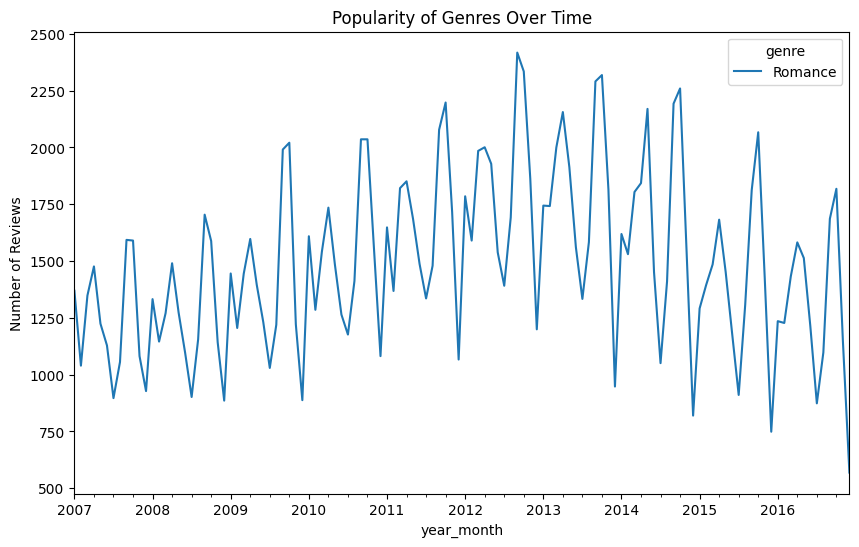

In [41]:
import matplotlib.pyplot as plt
import numpy as np
R_ten_df = R_df.drop(R_df[R_df['publication_day'] > 28].index)
R_ten_df = R_ten_df.drop(R_ten_df[R_ten_df['publication_year'] > 2016].index)
R_ten_df = R_ten_df.drop(R_ten_df[R_ten_df['publication_year'] < 2007].index)
len(R_ten_df)
R_ten_df['publication_date'] = pd.to_datetime(dict(day=R_ten_df['publication_day'], month=R_ten_df['publication_month'], year=R_ten_df['publication_year']), format = '%Y-%m-%d %H:%M')
print(R_ten_df['publication_date'])
R_ten_df['year_month'] = R_ten_df['publication_date'].dt.to_period('M')
print(R_ten_df['year_month'])
R_ten_df['genre'] = 'Romance'
genre_popularity2 = R_ten_df.groupby(['year_month', 'genre']).size().reset_index(name='review_count')
print(genre_popularity2)
genre_popularity_pivot2 = genre_popularity2.pivot(index='year_month', columns = 'genre', values='review_count')
genre_popularity_pivot2.plot(figsize=(10, 6))
plt.title('Popularity of Genres Over Time')
plt.ylabel('Number of Reviews')
plt.show()

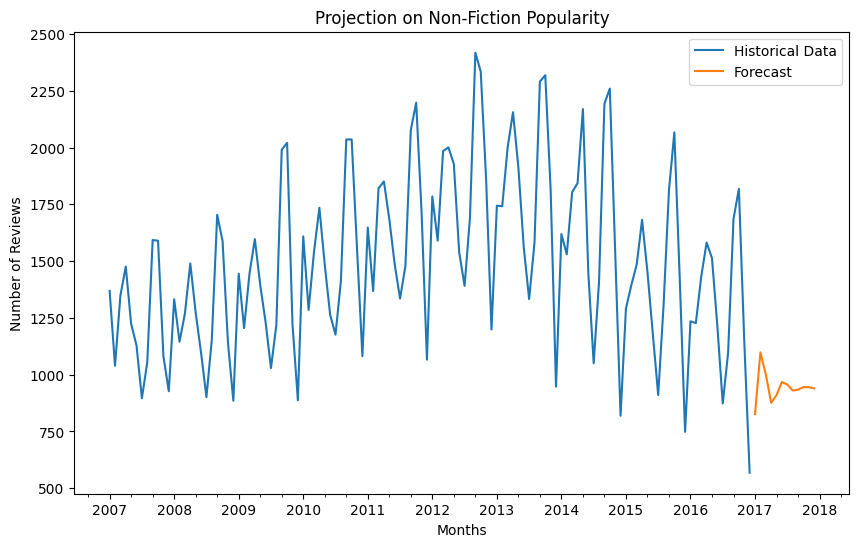

In [42]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# Example: Select a specific genre's data (e.g., 'Fantasy')
genre_popularity2 = genre_popularity2.dropna(subset=['year_month'])
genre_data = genre_popularity2['review_count']  # Make sure this is the review count for the genre you're forecasting
# Fit ARIMA model (example: ARIMA(5,1,0) - adjust these parameters as needed)
model = ARIMA(genre_data, order=(2,1,0))
model_fit = model.fit()
# Forecast next 12 periods (months, if using monthly data)
forecast = model_fit.forecast(steps=12)

# Plotting the forecast
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(genre_data, label='Historical Data')
ax.plot(range(len(genre_data), len(genre_data) + len(forecast)), forecast, label='Forecast')
ax.set_title('Projection on Non-Fiction Popularity')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Months')
months = ["2007", "2008","2009","2010","2011","2012","2013", 
        "2014","2015","2016","2017", "2018" ]
ax.set_xticks(np.arange(0, 134, step=12), months, rotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.legend()
plt.show()

11       2016-01-22
20       2015-10-20
112      2016-06-21
125      2015-12-15
127      2015-05-21
            ...    
533344   2016-06-28
533353   2016-08-02
533392   2015-08-01
533451   2015-11-04
533481   2016-04-19
Name: publication_date, Length: 32144, dtype: datetime64[ns]
11        2016-01
20        2015-10
112       2016-06
125       2015-12
127       2015-05
           ...   
533344    2016-06
533353    2016-08
533392    2015-08
533451    2015-11
533481    2016-04
Name: year_month, Length: 32144, dtype: period[M]
   year_month    genre  review_count
0     2015-01  Romance          1291
1     2015-02  Romance          1394
2     2015-03  Romance          1485
3     2015-04  Romance          1682
4     2015-05  Romance          1452
5     2015-06  Romance          1179
6     2015-07  Romance           910
7     2015-08  Romance          1307
8     2015-09  Romance          1812
9     2015-10  Romance          2067
10    2015-11  Romance          1425
11    2015-12  Romance     

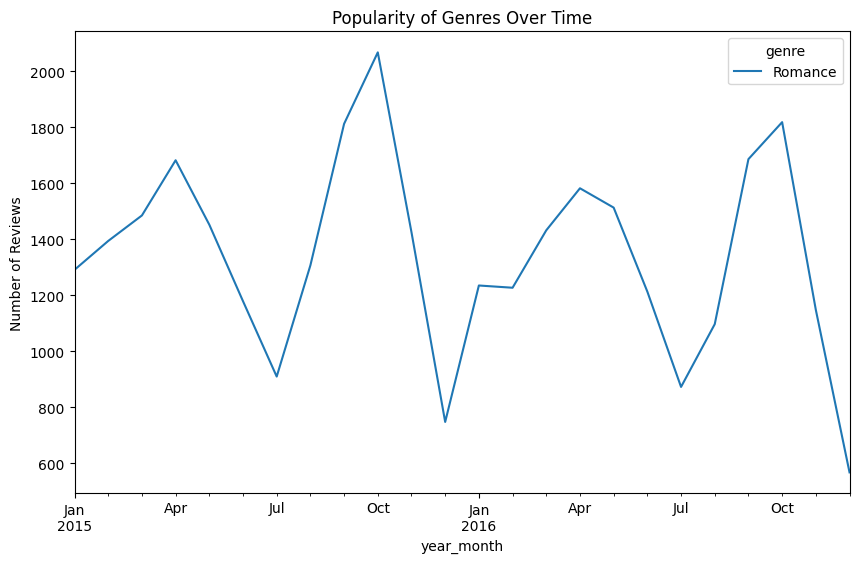

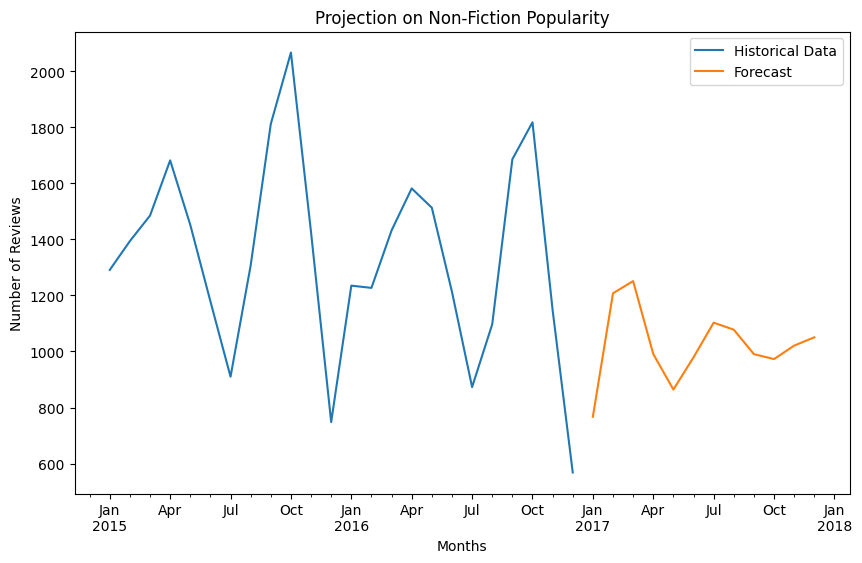

In [43]:
R_two_df = R_df.drop(R_df[R_df['publication_day'] > 28].index)
R_two_df = R_two_df.drop(R_two_df[R_two_df['publication_year'] > 2016].index)
R_two_df = R_two_df.drop(R_two_df[R_two_df['publication_year'] < 2015].index)
len(R_two_df)
R_two_df['publication_date'] = pd.to_datetime(dict(day=R_two_df['publication_day'], month=R_two_df['publication_month'], year=R_two_df['publication_year']), format = '%Y-%m-%d %H:%M')
print(R_two_df['publication_date'])
R_two_df['year_month'] = R_two_df['publication_date'].dt.to_period('M')
print(R_two_df['year_month'])
R_two_df['genre'] = 'Romance'
genre_popularity2 = R_two_df.groupby(['year_month', 'genre']).size().reset_index(name='review_count')
print(genre_popularity2)
genre_popularity_pivot2 = genre_popularity2.pivot(index='year_month', columns = 'genre', values='review_count')
genre_popularity_pivot2.plot(figsize=(10, 6))
plt.title('Popularity of Genres Over Time')
plt.ylabel('Number of Reviews')
plt.show()

#Forecast
genre_popularity2 = genre_popularity2.dropna(subset=['year_month'])
genre_data = genre_popularity2['review_count']  # Make sure this is the review count for the genre you're forecasting
# Fit ARIMA model (example: ARIMA(5,1,0) - adjust these parameters as needed)
model = ARIMA(genre_data, order=(2,1,0))
model_fit = model.fit()

# Forecast next 12 periods (months, if using monthly data)
forecast = model_fit.forecast(steps=12)
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(genre_data, label='Historical Data')
ax.plot(range(len(genre_data), len(genre_data) + len(forecast)), forecast, label='Forecast')
ax.set_title('Projection on Non-Fiction Popularity')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Months')
months = ["Jan\n2015", 'Apr', 'Jul', 'Oct', "Jan\n2016", 'Apr', 'Jul', 'Oct', "Jan\n2017", 'Apr', 'Jul', 'Oct', "Jan\n2018"]
ax.set_xticks(np.arange(0, 39, step=3), months, rotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.legend()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
#
# Get our test and train data
train_digits,test_digits = train_test_split(R_two_df['ratings_count'], test_size=0.2, random_state=42)
#
train = train_digits.to_numpy()
print(len(train))
#
test = test_digits.to_numpy()
print(len(test))

25715
6429


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(train, order=(2, 1,0))  # Adjust p, d, q as needed
model_fit = model.fit()

# Generate predictions on the test set
predictions = model_fit.forecast(len(test))

# Evaluate model performance (e.g., using Mean Squared Error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)
print(genre_popularity2.review_count.mean())
print(mae)
percent_diff = (mae)/genre_popularity2.review_count.mean()
print(percent_diff)

1339.3333333333333
189.1056353720613
0.14119385418521252
